# Numerical Integration of Differential Equations - The Damped Harmonic Oscillator

Damian French<br>
University of Manchester<br>
Febuary 2025

# Defining System

Equation of damped, SHM is $a(t)=-\frac{k}{m}x(t)-\frac{b}{m}v(t)$, where $x(t+h)=x(t)+hv(t)$ and $v(t+h)=v(t)+ha(t)$.

Initial Conditions are provided in the form of $k$ and $m$. b is chosen arbitrarily.



In [86]:
"""
Defining constants and importing needed modules.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

k=2.7
m=4.26
b=0.2
x0=1.0
v0=-0.2
T=200
h=0.05
time=np.linspace(0,T,int(T/h))

# Eulers Method
By re-ordering and re-writting these equations we can find a set of equations that can be solved to describe the motion of the system:<br>
$x_{i+1}=x_i+hv_i$<br>
$v_{i+1}=v_i+ha_i$<br>
$a_i=-\frac{k}{m}x_i-\frac{b}{m}v_i$<br>

Initial state of the system needs to be determined beforehand, so $x_0$ and $v_0$ need to be specfied along with $T$, the time the system is measured for, and $h$, the number of steps taken in the numerical integration.

In [87]:
def euler(m,b,k,T,h,x0,v0):
    """
    A function that uses Euler's method of numerical integration to calculate the displacement of a system undergoing damped SHM.

    Parameters
    ----------
    m : Float
        Mass of the system
    b : Float
        The damping factor of the system
    k : Float
        The spring constant of the system
    T : Integer
        Time of duration of total oscillation of the system
    h : float
        step size
    x0 : float
        initial displacement
    v0 : float
        initial velocity

    Returns
    -------
    x : Array
        Array of position values at each step
    v : Array
        Array of velocity values at each step
    """
    nsteps=int(T/h)
    global x
    global y
    x=np.zeros([nsteps])
    v=np.zeros([nsteps])
    x[0]=x0
    v[0]=v0
    for i in range(nsteps-1):
        a=-(k/m)*x[i]-(b/m)*v[i]
        v[i+1]=v[i]+h*a
        x[i+1]=x[i]+h*v[i]
    return x,v


# Improved Euler

Error in Eulers method can be found from the taylor expansion of $x(t+h)\approx x(t)+hx'(t)+\frac{1}{2}h^{2}x''(t)$<br>
Using $v=\lim_{h\to0}\frac{x(t+h)-x(t)}{h}$, we can show the error is $\frac{1}{2}hx''(t)$ which is of order h.<br>

By adding a term to the equation for displacement, we can reduce the error on our simulation of the system:<br>
$x_{i+1}=x_i+hv_i+\frac{h^2}{2}a_i$<br>
$v_{i+1}=v_i+ha_i$<br>
$a_i=-\frac{k}{m}x_i-\frac{b}{m}v_i$<br>

So the error is now of order $h^3$


In [88]:
def improved_euler(m,b,k,T,h,x0,v0):
    """
    A function that uses an improved version of Euler's method of numerical integration to calculate 
    the displacement of a system undergoing damped SHM.

    Parameters
    ----------
    m : Float
        Mass of the system
    b : Float
        The damping factor of the system
    k : Float
        The spring constant of the system
    T : Integer
        Time of duration of total oscillation of the system
    h : float
        step size
    x0 : float
        initial displacement
    v0 : float
        initial velocity

    Returns
    -------
    x : Array
        Array of position values at each step
    v : Array
        Array of velocity values at each step
    """
    nsteps=int(T/h)
    x=np.zeros([nsteps])
    v=np.zeros([nsteps])
    x[0]=x0
    v[0]=v0
    for i in range(nsteps-1):
        a=-(k/m)*x[i]-(b/m)*v[i]
        v[i+1]=v[i]+h*a
        x[i+1]=x[i]+h*v[i]+((h**2)/2)*a
    return x,v

# Verlet's Method

starting with a centered derivative: $x'(t)=\frac{x(t+h)-x(t-h)}{2h}$.<br>
once again using the taylor expansion of $x(t+h)\approx x(t)+hx'(t)+\frac{1}{2}h^{2}x''(t)$ and now also $x(t-h)\approx -x(t)+hx'(t)-\frac{1}{2}h^{2}x''(t)$<br>
we find that these 3 can be rearranged into equations for v and a:<br>
$v(t)=\frac{x(t+h)-x(t-h)}{2h}+\frac{1}{6}h^2x'''$<br>
$a(t)=\frac{x(t+h)-x(t-h)-2x(t)}{h^2}-\frac{1}{12}h^2x''''$<br><br>
The equations describing the motion of the system are then:<br>
$x_{i+1}=Ax_i+Bx_{i-1}$, $A=2\frac{2m-kh^2}{2m+bh}$, $B=\frac{bh-2m}{2m+bh}$<br>
$v_i=\frac{x_{i+1}-x_{i-1}}{2h}$<br>

Verlets method is symplectic, as explained with the Euler Cromer method

In [89]:
def Verlets(m,b,k,T,h,i,j,v0):
    """
    A function that uses Verlet numerical integration to calculate the displacement of a system undergoing damped SHM.

    Parameters
    ----------
    m : Float
        Mass of the system
    b : Float
        The damping factor of the system
    k : Float
        The spring constant of the system
    T : Integer
        Time of duration of total oscillation of the system
    h : float
        step size
    i : float
        initial displacement
    j :float
        displacement after 1 time step
    v0 : float
        initial velocity

    Returns
    -------
    x : Array
        Array of position values at each step
    v : Array
        Array of velocity values at each step
    """
    nsteps=int(T/h)
    x=np.zeros([nsteps])
    v=np.zeros([nsteps])
    x[0]=i
    x[1]=j
    v[0]=v0
    D=(2*m)+(b*h)
    A=2*((2*m-k*h**2)/D)
    B=(b*h-2*m)/D
    for n in range(nsteps-3):
        x[n+2]=A*x[n+1]+B*x[n]
        v[n+1]=(x[n+2]-x[n])/(2*h)
    return x,v

# Euler-Cromer Method

the equation for the energy of an oscillating system is $E_{i+1}=\frac{1}{2}kx^2_{i+1}+\frac{1}{2}mv^2_{i+1}$<br>
plugging in the equations used in Euler's method, we find that $E_{i+1}=E_i(1+\frac{k}{m}h^2)$, which predicts the energy of a closed system is increasing with h, clearly this is wrong.<br><br>
by changing Euler's method slightly, resulting in the Euler-Cromer method:<br>
$a_i=-\frac{k}{m}x_i-\frac{b}{m}v_i$<br>
$x_{i+1}=x_i+hv_{i+1}$<br>
$v_{i+1}=v_i+ax_{i}$<br>
we find that the energy is now conserved over one oscillation.
Energy is preserved over a cycle, but it oscillates about this average compared to the true energy.<br>
This is because this method is designed to be a solution to Hamiltons equations; $\frac{dp}{dt}=\frac{dH}{dq} and \frac{dq}{dt}=-\frac{dH}{dp}$, which means it is a symplectic integrator, and so has a conserved hamiltonian, and therefore energy.

In [90]:
def Euler_Cromer(m,b,k,T,h,x0,v0):
    """
    A function that uses the Euler-Cromer method of numerical integration to calculate
    the displacement of a system undergoing damped SHM.

    Parameters
    ----------
    m : Float
        Mass of the system
    b : Float
        The damping factor of the system
    k : Float
        The spring constant of the system
    T : Integer
        Time of duration of total oscillation of the system
    h : float
        step size
    x0 : float
        initial displacement
    v0 : float
        initial velocity

    Returns
    -------
    x : Array
        Array of position values at each step
    v : Array
        Array of velocity values at each step
    """
    nsteps=int(T/h)
    x=np.zeros([nsteps])
    v=np.zeros([nsteps])
    x[0]=x0
    v[0]=v0
    for i in range(nsteps-1):
        a=-(k/m)*x[i]-(b/m)*v[i]
        v[i+1]=v[i]+h*a
        x[i+1]=x[i]+h*v[i+1]
    return x,v

# Analyitical Solution

the solution to the general damped oscialltions is $x(t)=e^{-\frac{\gamma t}{2}}(Ae^{i\omega t}+Be^{-i\omega t})$<br>
$\gamma = \frac{b}{m}$ and $\omega^2=\omega^2_0-\frac{\gamma^2}{4}$, where $\omega_0=\sqrt{\frac{k}{m}}$<br>

$A$ and $B$ are found from the initial conditions

In [91]:
def analytical(b,m,time,k,x0,v0):
    """
    A function that uses the analytical solution to damped, harmonic motion to calculate the position of system undergoing SHM.

    Parameters
    ----------
    b: float
        The damping factor of the system
    m: float
        The mass of the system
    time: Array
        Array of values spaced by T/h going from 0 to T
    k: float
        spring constant of the system
    x0 : float
        initial displacement
    v0 : float
        initial velocity

    Returns
    -------
    x : Array
        Array of position values at each step
    """
    gamma=b/m
    omega_0=np.sqrt(k/m)
    omega=np.sqrt(omega_0**2-(gamma**2)/4)
    B=(1j*omega*x0-v0)/(2*omega*1j)
    A=x0-B
    x=np.exp(-(gamma*time)/2)*(A*np.exp(1j*omega*time)+B*np.exp(-1j*omega*time))
    v=-(gamma/2)*np.exp(-(gamma*time)/2)*(A*np.exp(1j*omega*time)+B*np.exp(-1j*omega*time))+np.exp(-(gamma*time)/2)*(1j*omega*A*np.exp(1j*omega*time)-1j*omega*B*np.exp(-1j*omega*time))
    return x,v

# Bringing all models together.

By plotting all the models with varying values for time step and damping factor, we can find what values work best to show a clear difference between models for the specific initial conditions provided.

We can see that as predicted by the energy, the Euler method diverges, as clearly shown when the step size is large.<br>
We also observe that although as the time steps get smaller, all models become more accurate, the euler-cromer and verlets methods are always very close to the analytical solution, suggesting they are the most accurate.

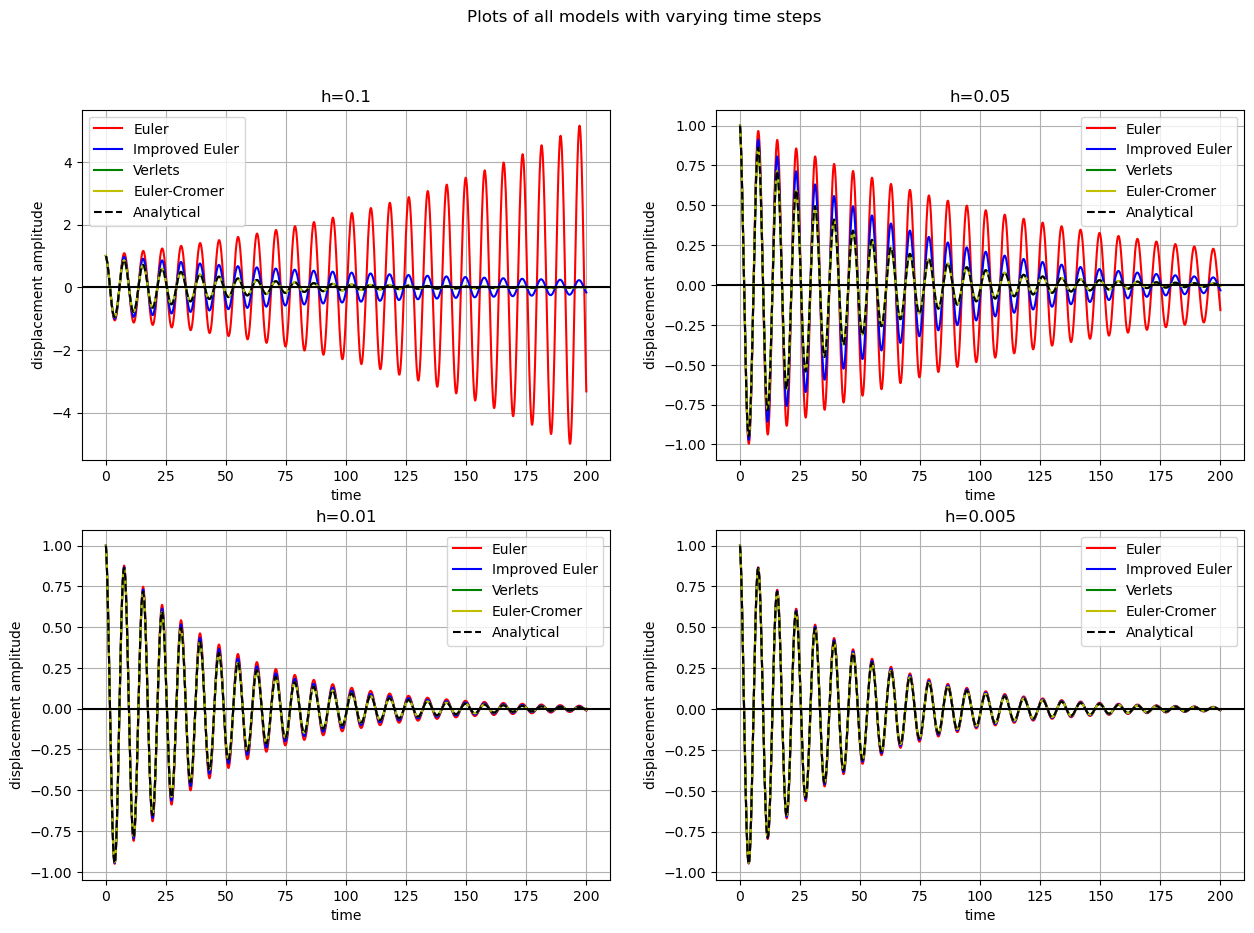

In [92]:
fig1,ax1=plt.subplots(2,2,figsize=(15,10))

h_values=[0.1,0.05,0.01,0.005]#values of step size used to demonstrate the limitations of the different models.

for i in h_values:
    t=np.linspace(0,T,int(T/i))
    plt.subplot(2,2,h_values.index(i)+1)
    plt.ylabel('displacement amplitude')
    plt.xlabel('time')
    plt.title('h={}'.format(i))
    plt.plot(t,euler(m,b,k,T,i,x0,v0)[0],'r',label='Euler')
    plt.plot(t,improved_euler(m,b,k,T,i,x0,v0)[0],'b',label='Improved Euler')
    plt.plot(t,Verlets(m,b,k,T,i,improved_euler(m,b,k,T,i,x0,v0)[0][0],improved_euler(m,b,k,T,i,x0,v0)[0][1],v0)[0],'g',label='Verlets')
    plt.plot(t,Euler_Cromer(m,b,k,T,i,x0,v0)[0],'y',label='Euler-Cromer')
    plt.plot(t,np.real(analytical(b,m,t,k,x0,v0)[0]),'k--',label='Analytical')
    plt.axhline(0,color='k')
    plt.grid()
    plt.legend()
fig1.suptitle('Plots of all models with varying time steps')
plt.show()

# Energy conservation

we know that the energy of the system must tend to 0 as T tends to infinity, as the system is damped so must be losing energy as friction is a non-conservative force.<br>
The equation for the energy of the system is:<br>
$E=\frac{mv^2}{2}+\frac{kx^2}{2}$<br>
Using this we can caluculate the energy of each method and compare them to the analytical model. Again, we find that at large step size the Euler method goes to infinity.<br>
We also find that the Verlets and Euler-Cromer methods are the best as are closest to the analytical model.

In [93]:
def Energy(m,k,x,v):
    """
    Function that returns the energy of a SHM system.

    Parameters
    ----------
    m: float
        mass of the system
    k: float
        spring constant of the system
    x: Array
        displacement of the system at each time step
    v: Array
        velocity of the system at each time step

    Returns
    -------
    Energy of the system as an Array
    """
    return ((m*v**2)/2)+((k*x**2)/2)
def RMS(model,expected):
    """
    Function that returns the root mean squared of the difference between modelled values and the expected values

    Parameters
    ----------
    model: Array
        model data
    expected: Array
        expected data

    Returns
    Array of RMS values
    """
    return np.sqrt(np.mean((model-expected)**2))

--------------------- h=0.1 -----------------------
RMS of energy for Euler-Cromer=0.009540232816459689
RMS of energy for Verlet=0.0045077412169857965
--------------------- h=0.05 -----------------------
RMS of energy for Euler-Cromer=0.005011371670433169
RMS of energy for Verlet=0.0043794218804497406
--------------------- h=0.01 -----------------------
RMS of energy for Euler-Cromer=0.003972270184402239
RMS of energy for Verlet=0.0043547118868520925
--------------------- h=0.005 -----------------------
RMS of energy for Euler-Cromer=0.00413791181613638
RMS of energy for Verlet=0.004356371625372921


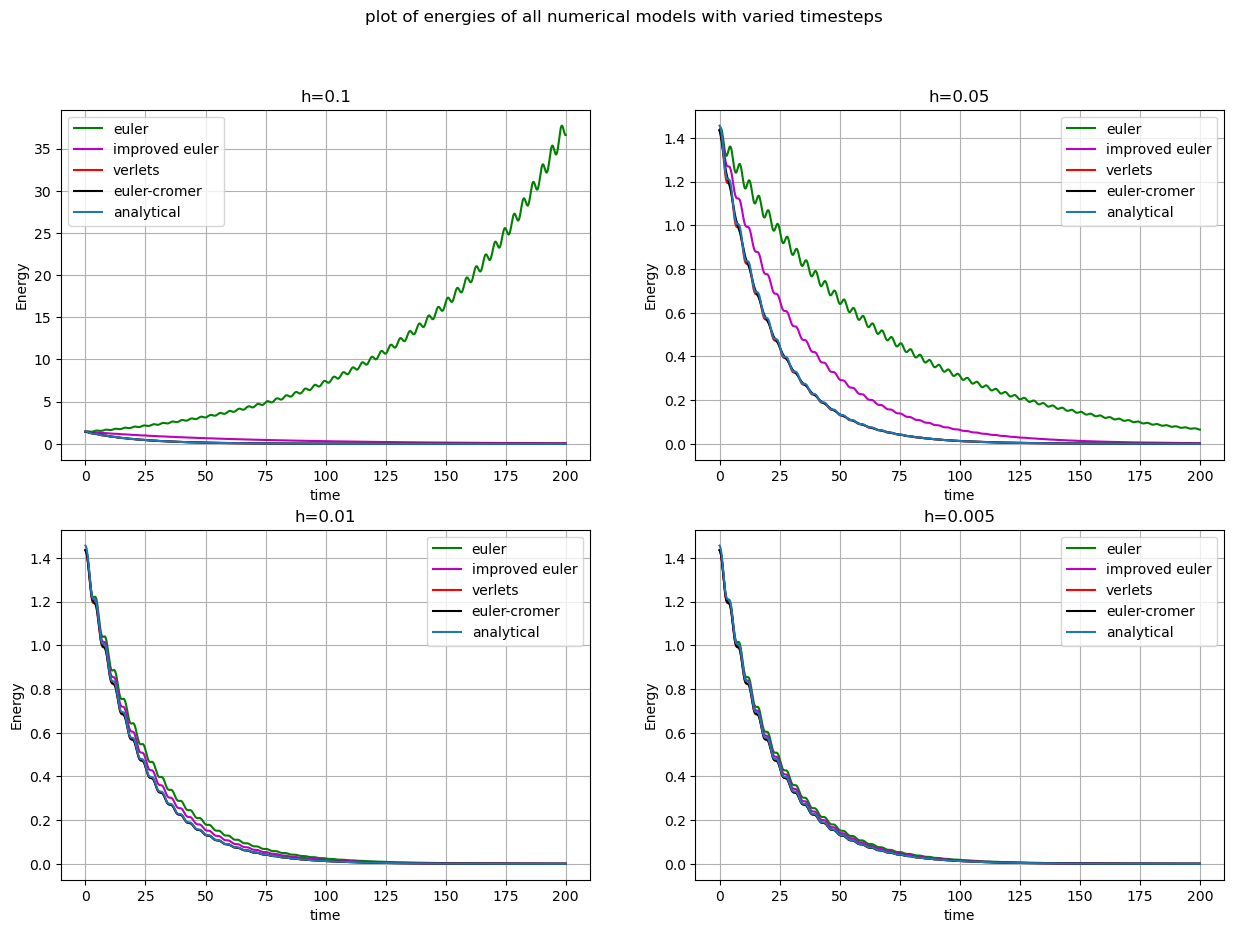

In [94]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
h_values=[0.1,0.05,0.01,0.005]#values of step size used to demonstrate the limitations of the different models.
for i in h_values:
    time=np.linspace(0,T,int(T/i))
    #calcualting arrays for the energy of each method for each time step
    euler_Energy=Energy(m,k,euler(m,b,k,T,i,x0,v0)[0],euler(m,b,k,T,i,x0,v0)[1])
    improved_euler_Energy=Energy(m,k,improved_euler(m,b,k,T,i,x0,v0)[0],improved_euler(m,b,k,T,i,x0,v0)[1])
    verlets_Energy=Energy(m,k,Verlets(m,b,k,T,i,improved_euler(m,b,k,T,i,x0,v0)[0][0],improved_euler(m,b,k,T,i,x0,v0)[0][1],v0)[0],Verlets(m,b,k,T,i,improved_euler(m,b,k,T,i,x0,v0)[0][0],improved_euler(m,b,k,T,i,x0,v0)[0][1],v0)[1])
    euler_cromer_Energy=Energy(m,k,Euler_Cromer(m,b,k,T,i,x0,v0)[0],Euler_Cromer(m,b,k,T,i,x0,v0)[1])
    analytical_Energy=Energy(m,k,np.real(analytical(b,m,time,k,x0,v0)[0]),np.real(analytical(b,m,time,k,x0,v0)[1]))
    plt.subplot(2,2,h_values.index(i)+1)
    plt.title('h={}'.format(i))
    plt.plot(time,euler_Energy,'g',label='euler')
    plt.plot(time,improved_euler_Energy,'m',label='improved euler')
    plt.plot(time,verlets_Energy,'r-',label='verlets')
    plt.plot(time,euler_cromer_Energy,'k-',label='euler-cromer')
    plt.plot(time,analytical_Energy,label='analytical')
    plt.xlabel('time')
    plt.ylabel('Energy')
    plt.grid()
    plt.legend()
    print('---------------------',\
         'h={}'.format(i),
         '-----------------------')
    print('RMS of energy for Euler-Cromer={}'.format(RMS(euler_cromer_Energy,analytical_Energy)))
    print('RMS of energy for Verlet={}'.format(RMS(verlets_Energy,analytical_Energy)))
fig.suptitle('plot of energies of all numerical models with varied timesteps')
plt.show()


# Round-Off Error

We can clearly see that as time divisions get smaller, all models become good predictions of the analytical model, as they all quickly tend to an energy of 0.<br>
But for larger time step values, the verlet's method and the euler-cromer method are clearly superior to the other two, but they are very similar so it is difficult to tell just from the energies which  one is a better model.<br>

Using the idea of a residual, and so calcualting the difference between the expected value and a model, we can determine 1. which model is better, and 2. what the optimal value of h, the time divisions, is for the model to best approximate the analytical model.

We can see that the euler-cromer method is better in this case, as the difference between it and the analytical is less than for verlets.<br>
It can also be seen that the best value for h, the step size, is about 0.062, as this is at the minimum of the graph of RMS against h.

--------------------- h=0.06 -----------------------
RMS for Verlets= 0.008062413064529322
RMS for Euler-Cromer= 0.001688774416205694
--------------------- h=0.061 -----------------------
RMS for Verlets= 0.008572207743464618
RMS for Euler-Cromer= 0.001279697508807231
--------------------- h=0.062 -----------------------
RMS for Verlets= 0.008766211323131476
RMS for Euler-Cromer= 0.0011611386207359584
--------------------- h=0.063 -----------------------
RMS for Verlets= 0.008493796748992671
RMS for Euler-Cromer= 0.001446501949116525


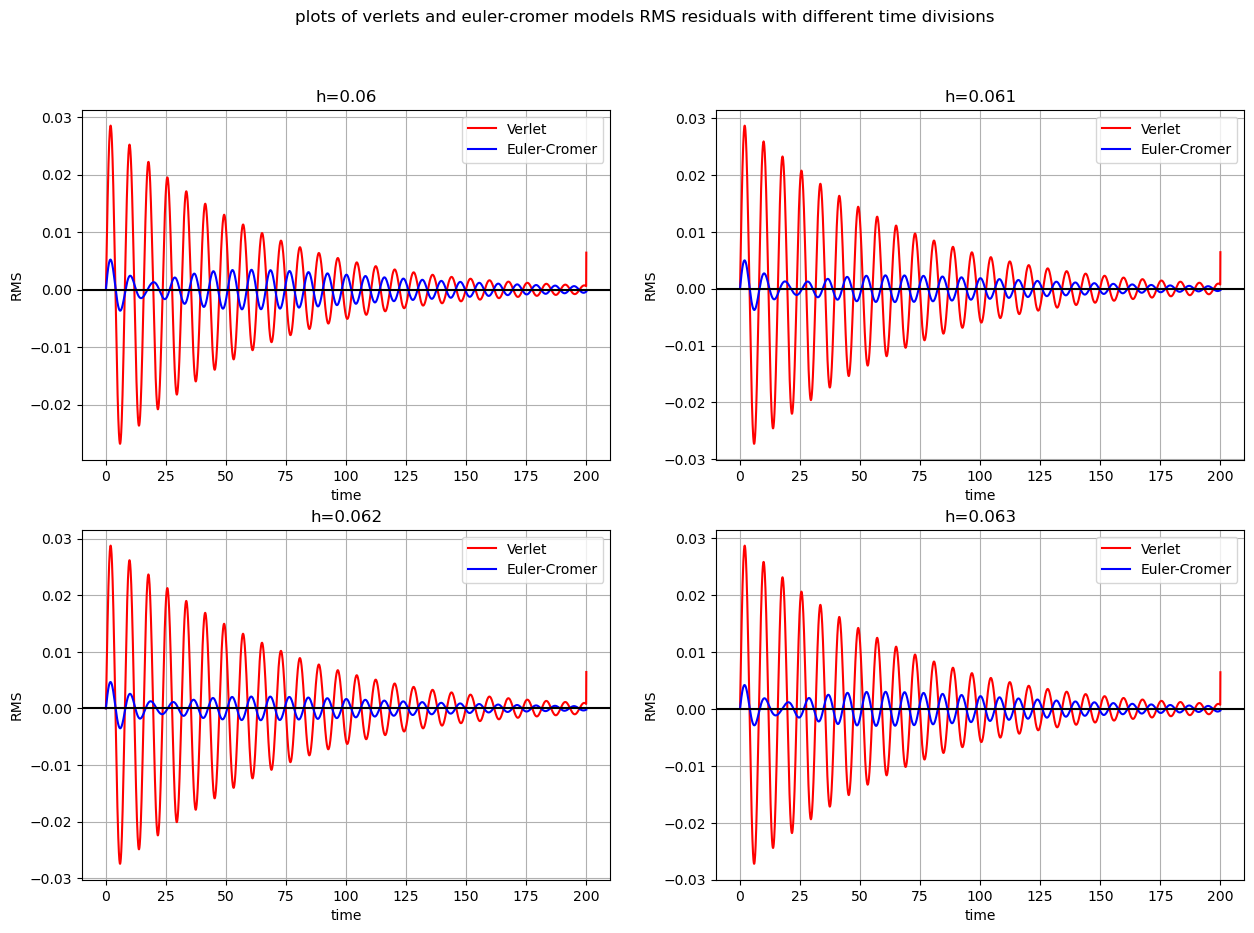

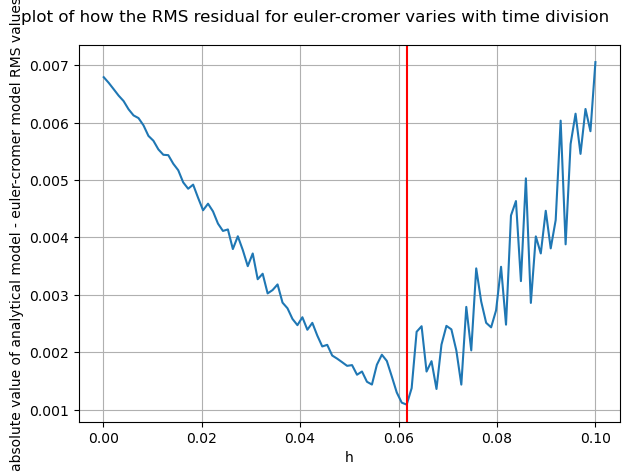

In [95]:


fig,ax=plt.subplots(2,2,figsize=(15,10))
fig.suptitle('plots of verlets and euler-cromer models RMS residuals with different time divisions')
h_values=[0.06,0.061,0.062,0.063]#values of step size used to demonstrate the limitations of the different models.
for i in h_values:
    t=np.linspace(0,T,int(T/i))#redefining the time array for each value of h used
    plt.subplot(2,2,h_values.index(i)+1)
    plt.title('h={}'.format(i))
    plt.plot(t,Verlets(m,b,k,T,i,improved_euler(m,b,k,T,i,x0,v0)[0][0],improved_euler(m,b,k,T,i,x0,v0)[0][1],v0)[0]-np.real(analytical(b,m,t,k,x0,v0)[0]),'r',label='Verlet')
    plt.plot(t,Euler_Cromer(m,b,k,T,i,x0,v0)[0]-np.real(analytical(b,m,t,k,x0,v0)[0]),'b',label='Euler-Cromer')
    plt.xlabel('time')
    plt.ylabel('RMS')
    plt.axhline(0,color='k')
    plt.grid()
    plt.legend()
    print('---------------------',\
         'h={}'.format(i),
         '-----------------------')
    print('RMS for Verlets=',\
         
          RMS(Verlets(m,b,k,T,i,improved_euler(m,b,k,T,i,x0,v0)[0][0],improved_euler(m,b,k,T,i,x0,v0)[0][1],v0)[0],np.real(analytical(b,m,t,k,x0,v0)[0]))\
         )
    print('RMS for Euler-Cromer=',\
         RMS(Euler_Cromer(m,b,k,T,i,x0,v0)[0],np.real(analytical(b,m,t,k,x0,v0)[0]))
         )

fig2,ax2=plt.subplots(1,1)
fig2.suptitle('plot of how the RMS residual for euler-cromer varies with time division')
plt.subplot(1,1,1)
plt.grid()
h=np.linspace(0.0001,0.1,100)

def h_space(h):
    """
    Function calcualting the RMS for a given hstep value

    Parameters
    ----------
    h : float
        size of each time step

    Returns
    -------
    RMS of euler-cromer - analytical displacement
    """
    t=np.linspace(0,T,int(T/h))
    return RMS(Euler_Cromer(m,b,k,T,h,x0,v0)[0],np.real(analytical(b,m,t,k,x0,v0)[0]))

e=list(map(h_space,h))#maps the h array onto the h_space function
plt.plot(h,e)
plt.xlabel('h')
plt.ylabel('absolute value of analytical model - euler-cromer model RMS values')
plt.axvline(h[e.index(min(e))],color='r')#shows the minimum of the h-space plot.
#print(finding_best_h(m,b,k,T,x0,v0))
plt.tight_layout()
plt.show()

# varying damping factor

It is clear from the energy graphs as well as the residuals that the Euler-Cromer method is best suited to model SHO with the given initial conditions of m and k.

We can vary the damping term b and see what effec this has on our model.

the critical damping factor occurs when $\omega=0$, therefore $b^2_{crit}=4km$.<br>
At $b=b_{crit}$, critical damping occurs, meaning the displacement of the oscillator reaches 0 in the fastest possible time without oscillations.<br>
At $b=\frac{b_{crit}}{2}$, we get a faster decent to 0 displacement, but with subsequent small oscillations, showing we have now underdamped our system.<br>
at $b=2b_{crit}$, we get a slower decent to 0 displacement, showing we are now overdamping our system.

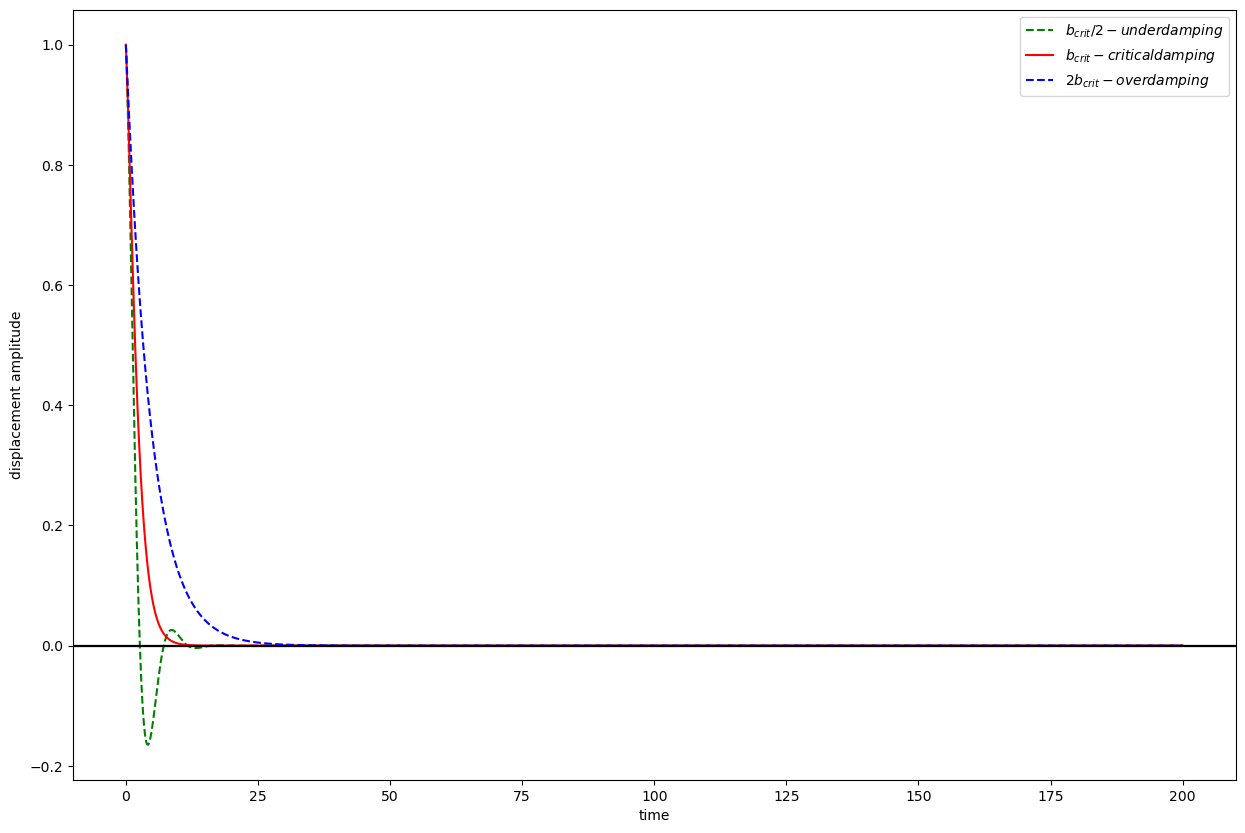

In [96]:
b_crit=np.sqrt(4*k*m)
h=0.061
time=np.linspace(0,T,int(T/h))
damping_factors=[b_crit/2,b_crit,2*b_crit]
fig,ax=plt.subplots(1,1,figsize=(15,10))
names=['b_{crit}/2 - underdamping','b_{crit} - critical damping','2b_{crit} - overdamping']
colors=['g--','r','b--']
for damping_factor in damping_factors:
    plt.subplot(1,1,1)
    plt.plot(time,Euler_Cromer(m,damping_factor,k,T,h,x0,v0)[0],'{}'.format(colors[damping_factors.index(damping_factor)]),label=r'${}$'.format(names[damping_factors.index(damping_factor)]))
    plt.axhline(0,color='k')
    plt.xlabel('time')
    plt.ylabel('displacement amplitude')
plt.legend()
plt.show()

# Forced Damped Harmonic Motion - PUSH

we can change the equation for SHM to include a driving force:<br>
$a(t)=-\frac{k}{m}x(t)-\frac{b}{m}v(t)+\frac{F}{m}$<br>
This can then we added to the Euler-Cromer numerical method by adding the same term to the acceleration term equation:<br>
$a_i=-\frac{k}{m}x_i-\frac{b}{m}v_i+\frac{F}{m}$<br>

Here we apply a short 'push' force that boosts our oscillations but doesn't continue.<br>

What we observe is threefold:<br>
First of all, if the push is small and applied close to the start of the oscillations, where the displacement is still quite large, there is not a large effect.<br>
Secondly, the size of the force clearly impacts the size of the resulting oscillations, with the smaller force creating a smaller effect.<br>
Thirdly, the direction of the force has a large impact on the subsequent oscillations. It can clearly be seen from the bellow graphs that if the push is applied in the same direction as the velocity, the displacement oscillations increase in amplitude, whereas if the force is in the opposite direction, the effect is to lessen the amplitude of oscillations. This is most clearlt seen in the graphs displaying the smaller force applied towards the end of the time, as this is where the impact will be greatest. The effect can still be seen with the large force but it is large enough to change direction of the oscillations and provide enough drive to keep the system oscillating so the effect is less pronounced.

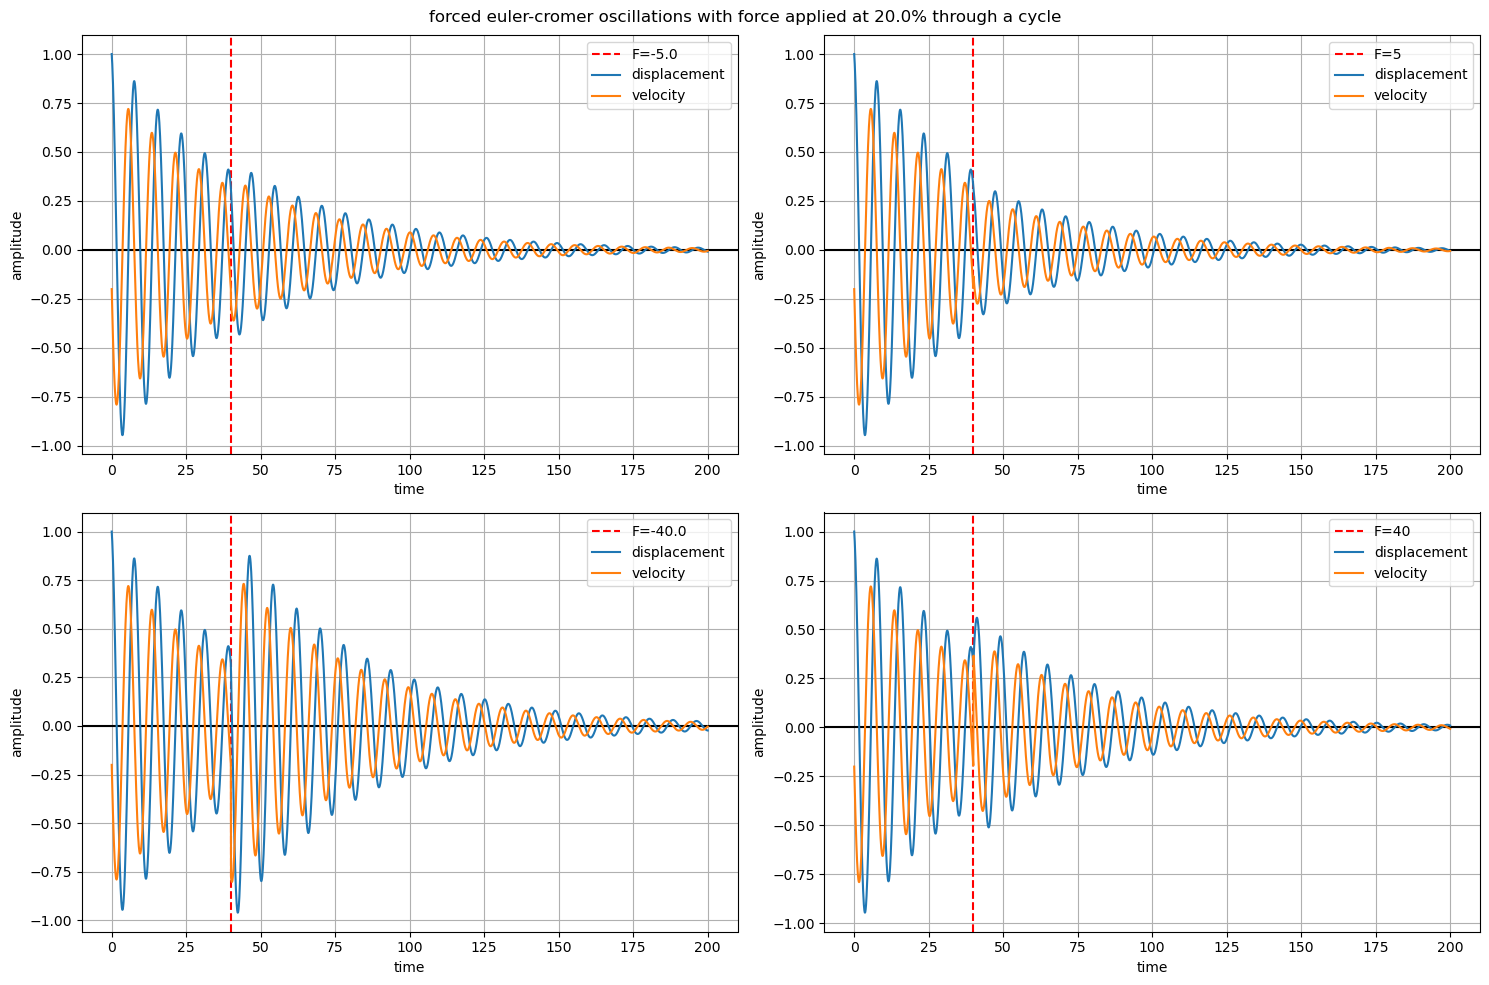

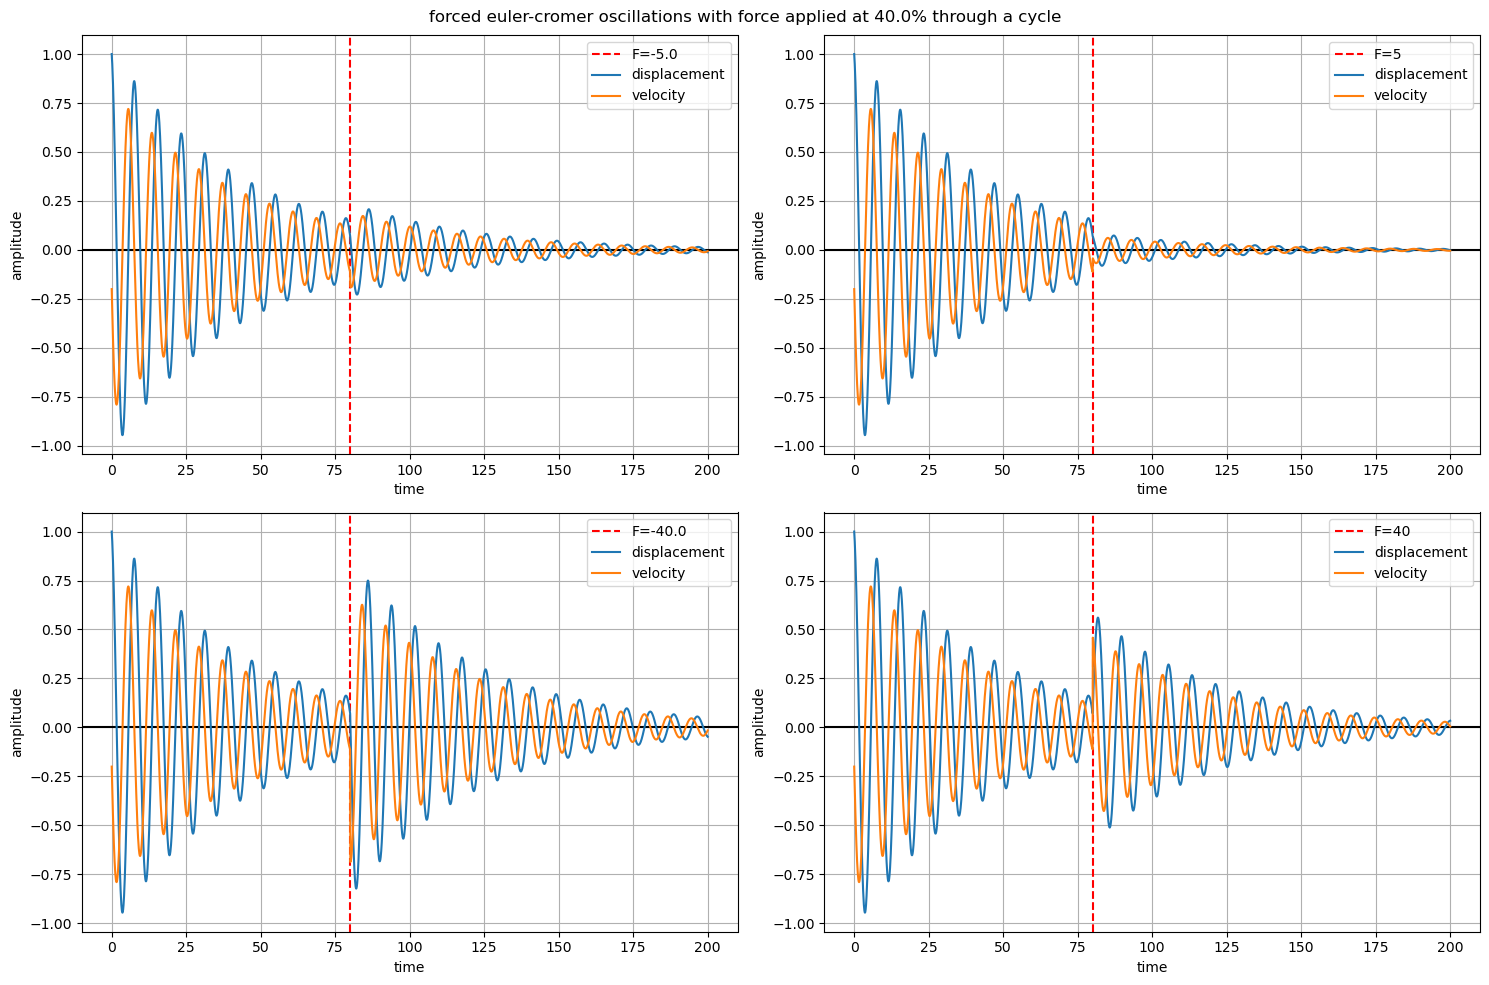

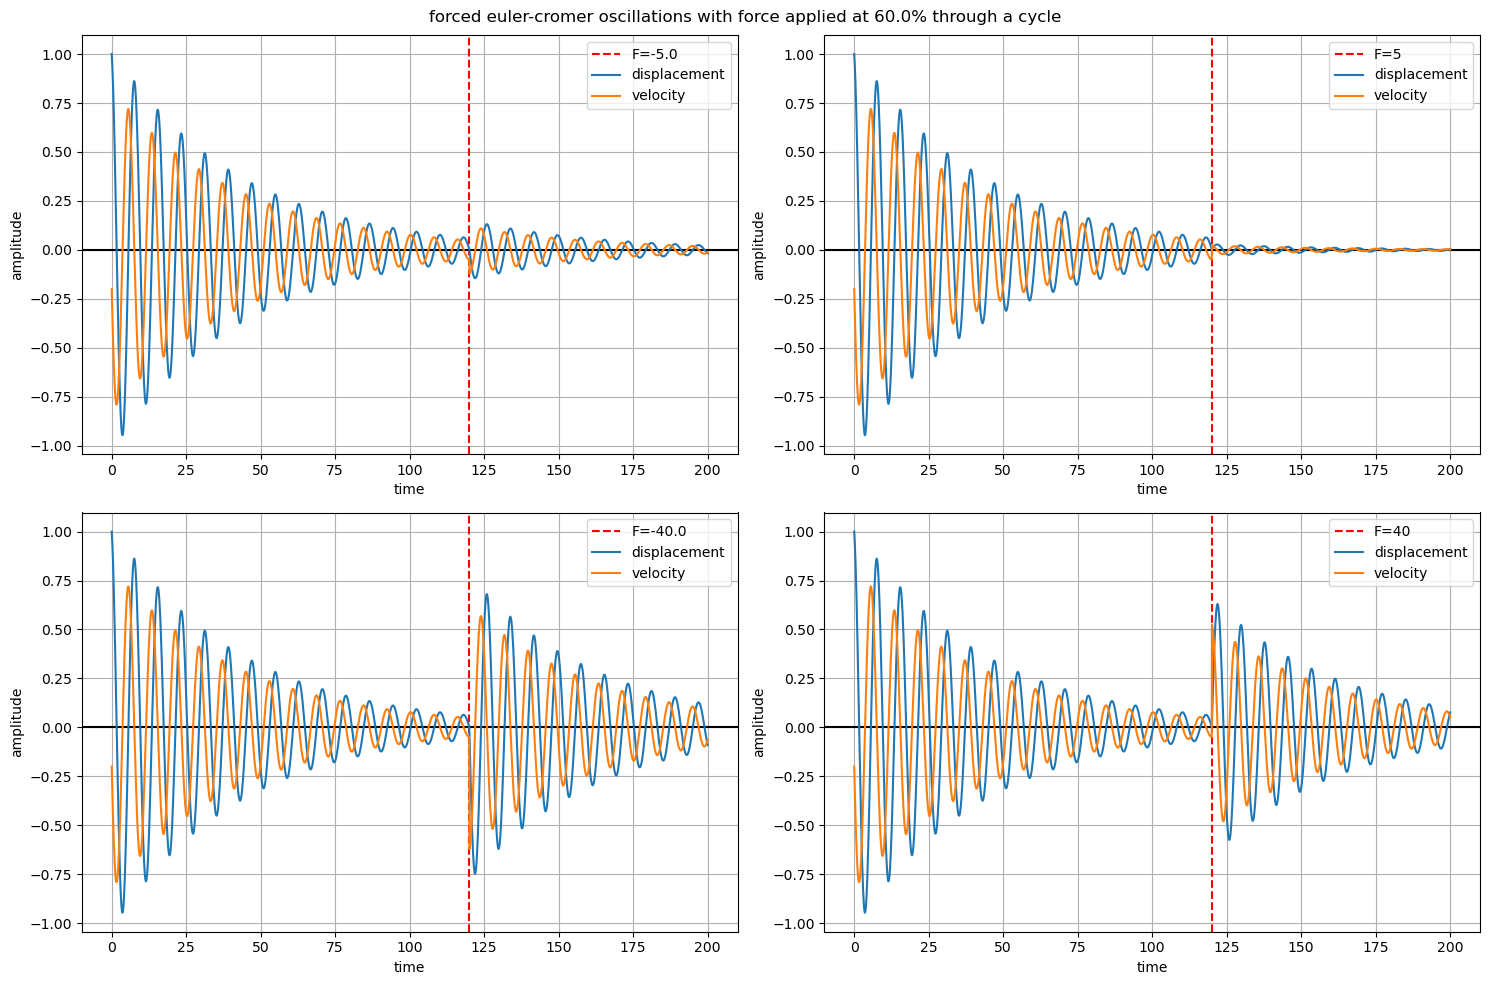

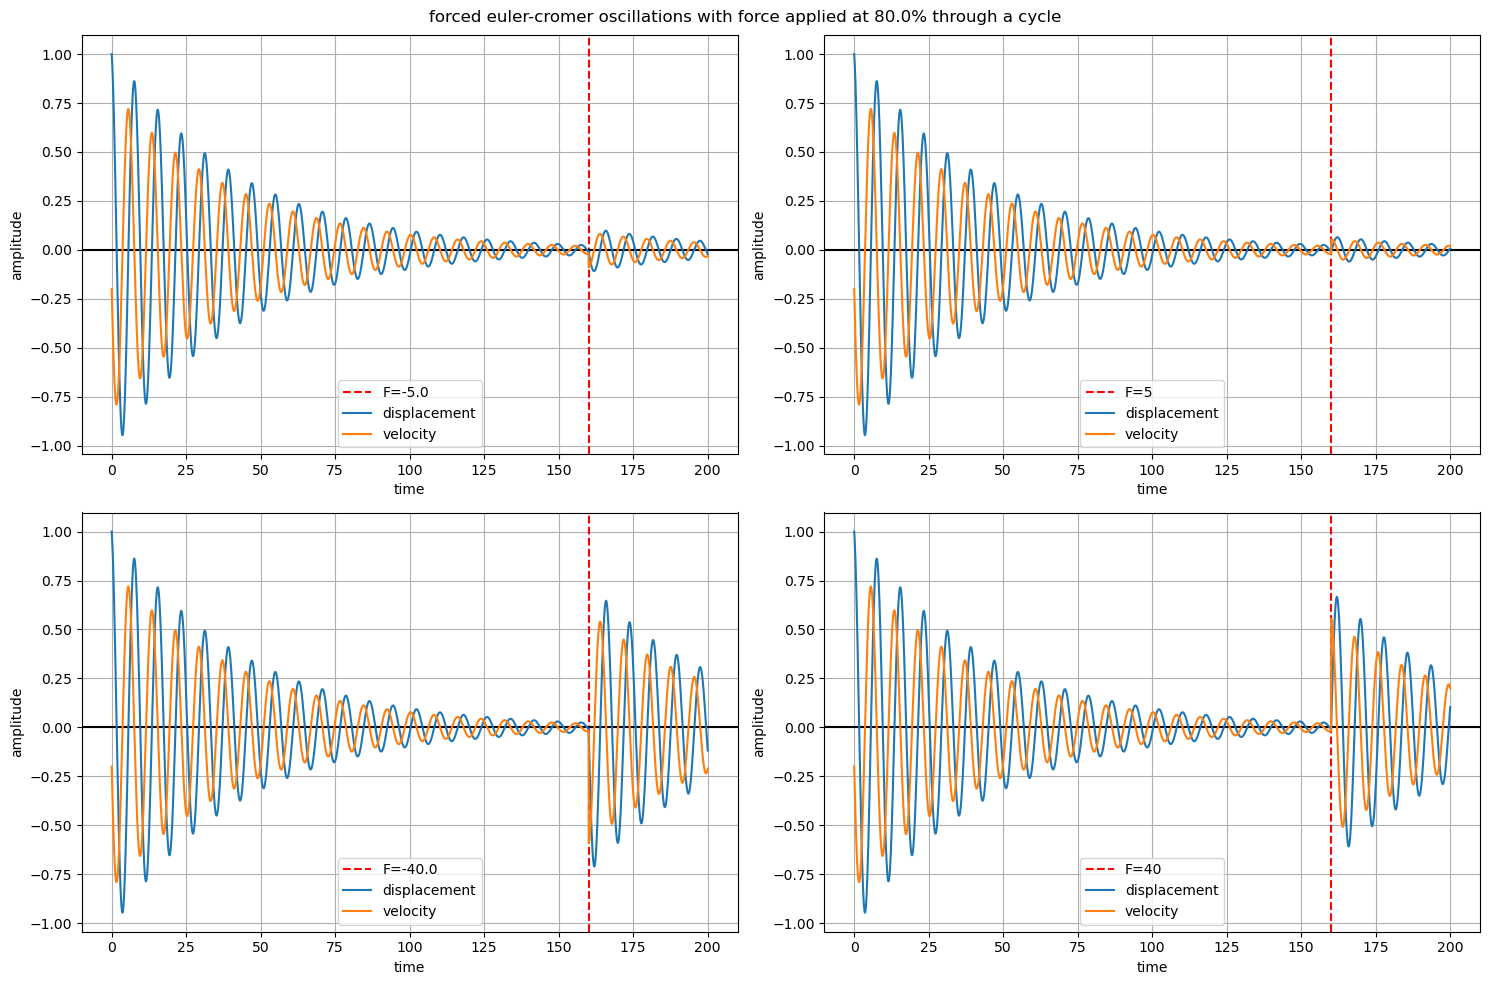

In [97]:

def pushed_euler_cromer(m,b,k,T,h,x0,v0,F,fraction,flipped):
    """
    Function that determins the displacement and velocity of a system undergoing SHM with a push at a certain point in time.

    Parameters
    ----------
    m : Float
        Mass of the system
    b : Float
        The damping factor of the system
    k : Float
        The spring constant of the system
    T : Integer
        Time of duration of total oscillation of the system
    h : float
        step size
    x0 : float
        initial displacement
    v0 : float
        initial velocity
    F : integer
        magnitude of force in push
    fraction: float
        fraction of time after which push is applied
    flipped: Boolean
        Boolean determining if force should be applied in same direction as velocity
    
    Returns
    -------
    x : Array
        Array of position values at each step
    v : Array
        Array of velocity values at each step
    """
    nsteps=int(T/h)
    x=np.zeros([nsteps])
    v=np.zeros([nsteps])
    x[0]=x0
    v[0]=v0
    for i in range(nsteps-1):
        if int(fraction*nsteps)==i:
            if flipped==True:
                F=F*v[i]/abs(v[i])
            plt.axvline(fraction*T,color='r',ls='--',label='F={}'.format(F))
            a=-(k/m)*x[i]-(b/m)*v[i]+F/m
        else:
            a=-(k/m)*x[i]-(b/m)*v[i]
        v[i+1]=v[i]+h*a
        x[i+1]=x[i]+h*v[i+1]
    return x,v
Forces=[5,40]#array of forces to be applied
position=[0.2,0.4,0.6,0.8]#array of positions to apply the forces at
flipped=[True,False]#array of booleans to determine the direction of the force applied
for p in position:
    plt.subplots(2,2,figsize=(15,10))
    plt.suptitle('forced euler-cromer oscillations with force applied at {}% through a cycle'.format(p*100))
    for f in Forces:
        for fl in flipped:
            plt.subplot(2,2,2*Forces.index(f)+flipped.index(fl)+1)
            forced_data=pushed_euler_cromer(m,b,k,T,h,x0,v0,f,p,fl)
            plt.axhline(0,color='k')
            plt.plot(time,forced_data[0],label='displacement')
            plt.plot(time,forced_data[1],label='velocity')
            plt.xlabel('time')
            plt.ylabel('amplitude')
            plt.legend()
            plt.grid()
        plt.tight_layout()
plt.show()

# Forced Damped Harmonic Motion - Driving

Here we apply a continuous driving force that oscillates with some frequency $\omega_d$<br>

We observe that at frequencies of $\omega_d$ close to the natural frequency $\omega_0=0.796$, resonance occurs and the displacement and velocity of the system increases.<br>
When $\omega_d$ is further away from $\omega_0$, the effect of the driving force tends to reduce the amplitude of oscillations.<br>

we also observe that after the forcing is started, there is a region of transience, where the amplitudes of oscillations are changing, and the frequency of the forced oscillations is also changing, due to the phase shift caused by the forcing frequency. This transience region is much larger when $\omega_d$ is further away from the resonant frequency, which is why it is much more prominent in the later graphs.<br>

It can also be seen that the phase difference between the forced ocillations and the force, after the transient period, is consistent with the phase lag graph shown in the next section.



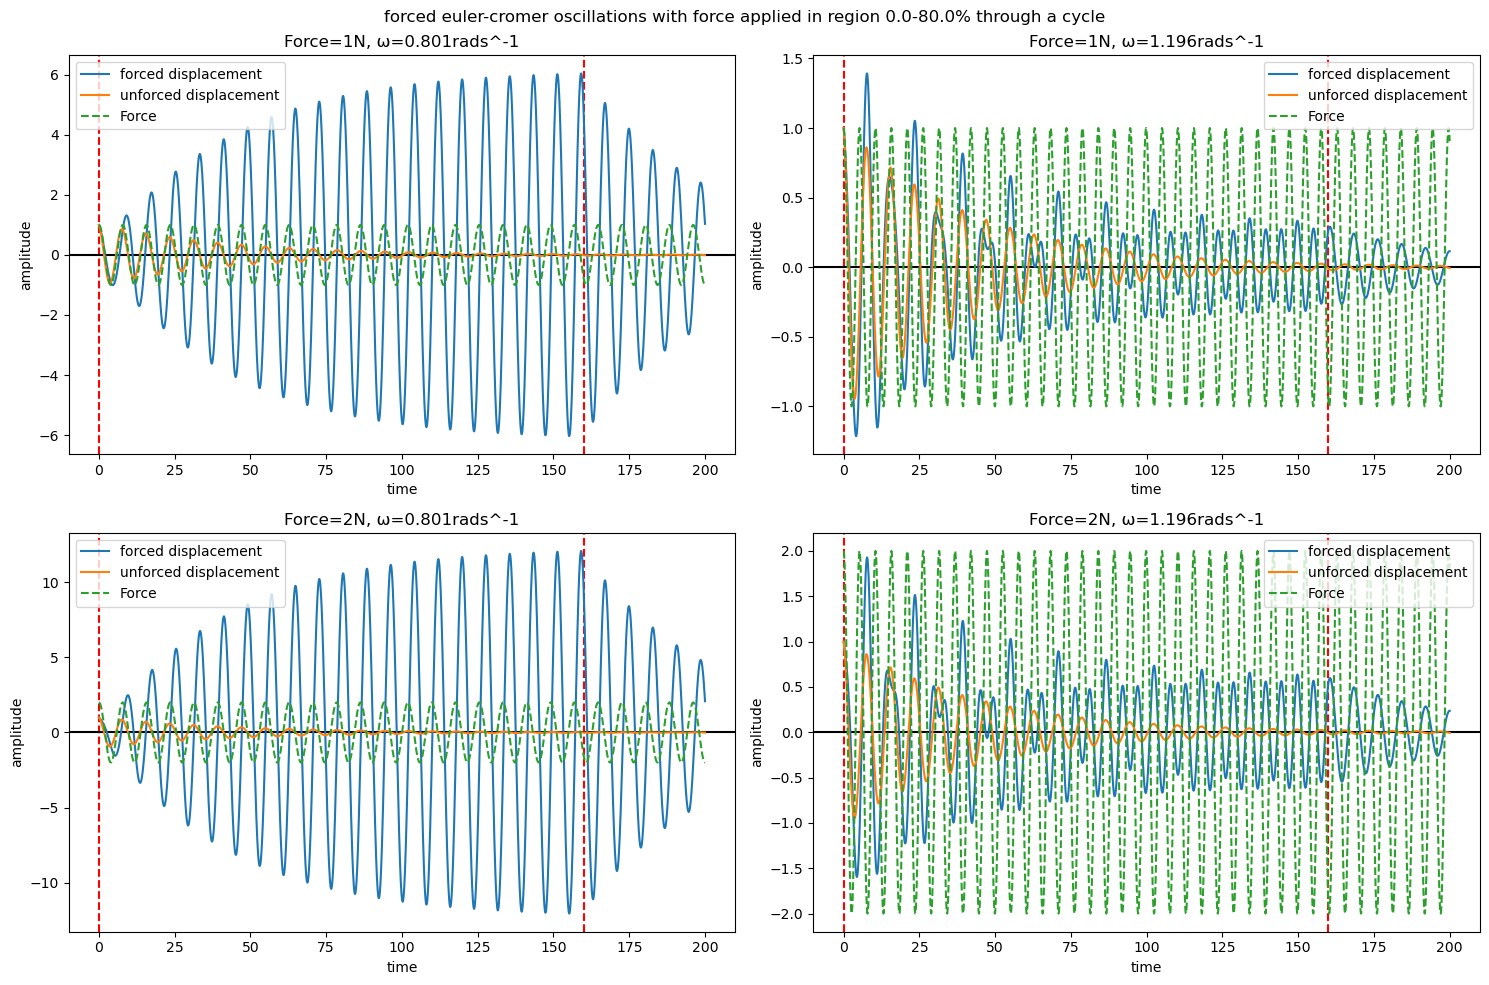

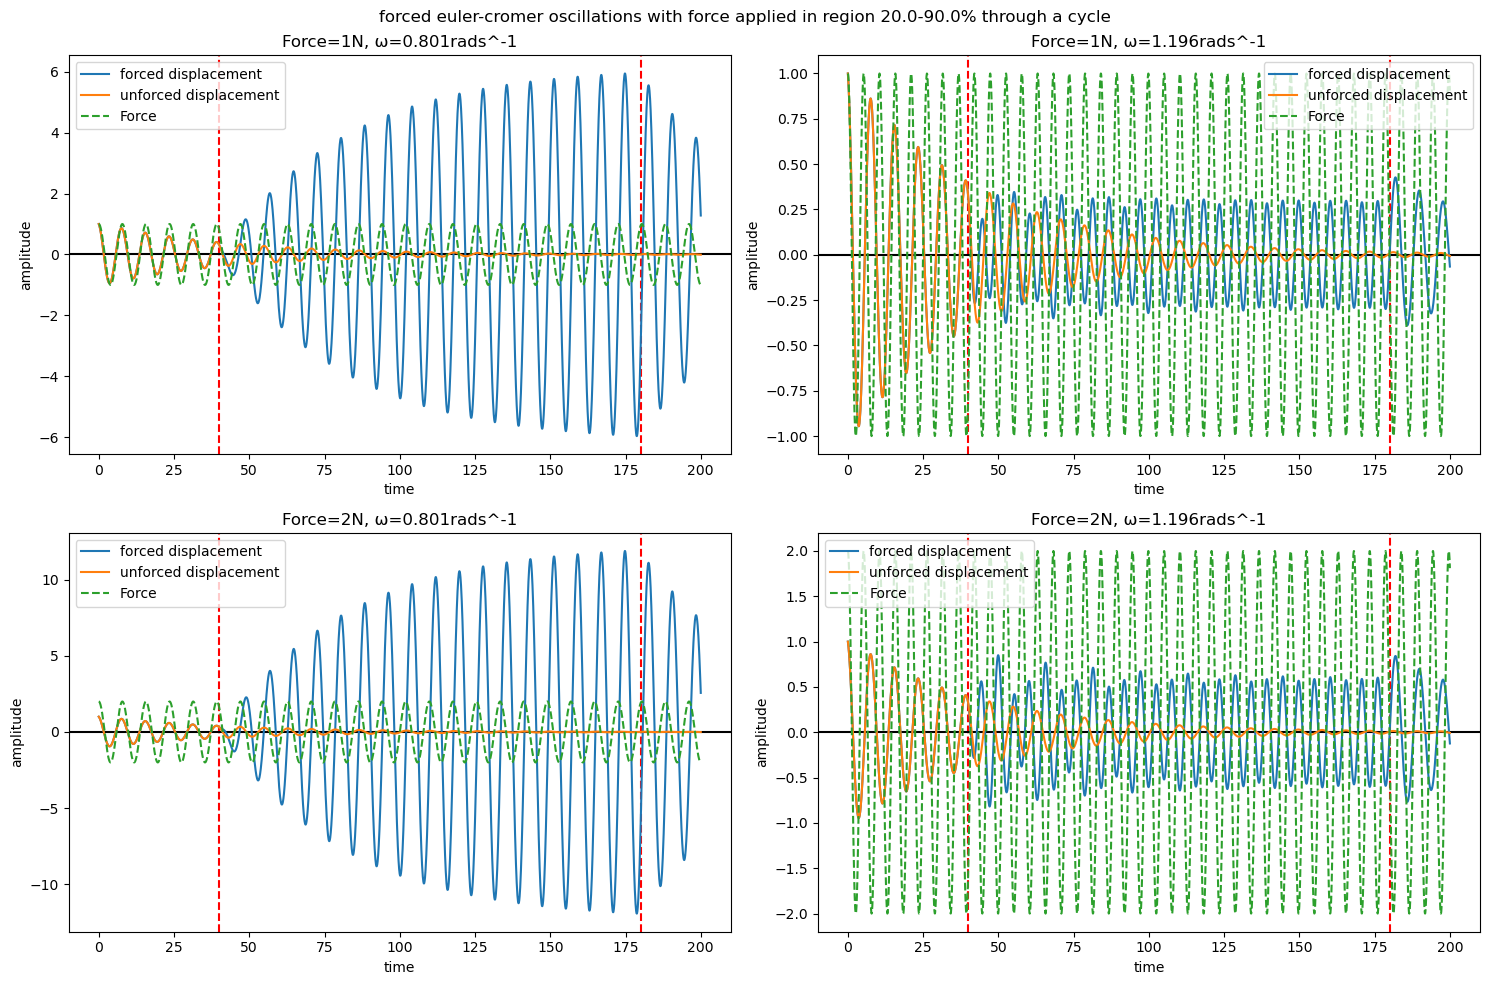

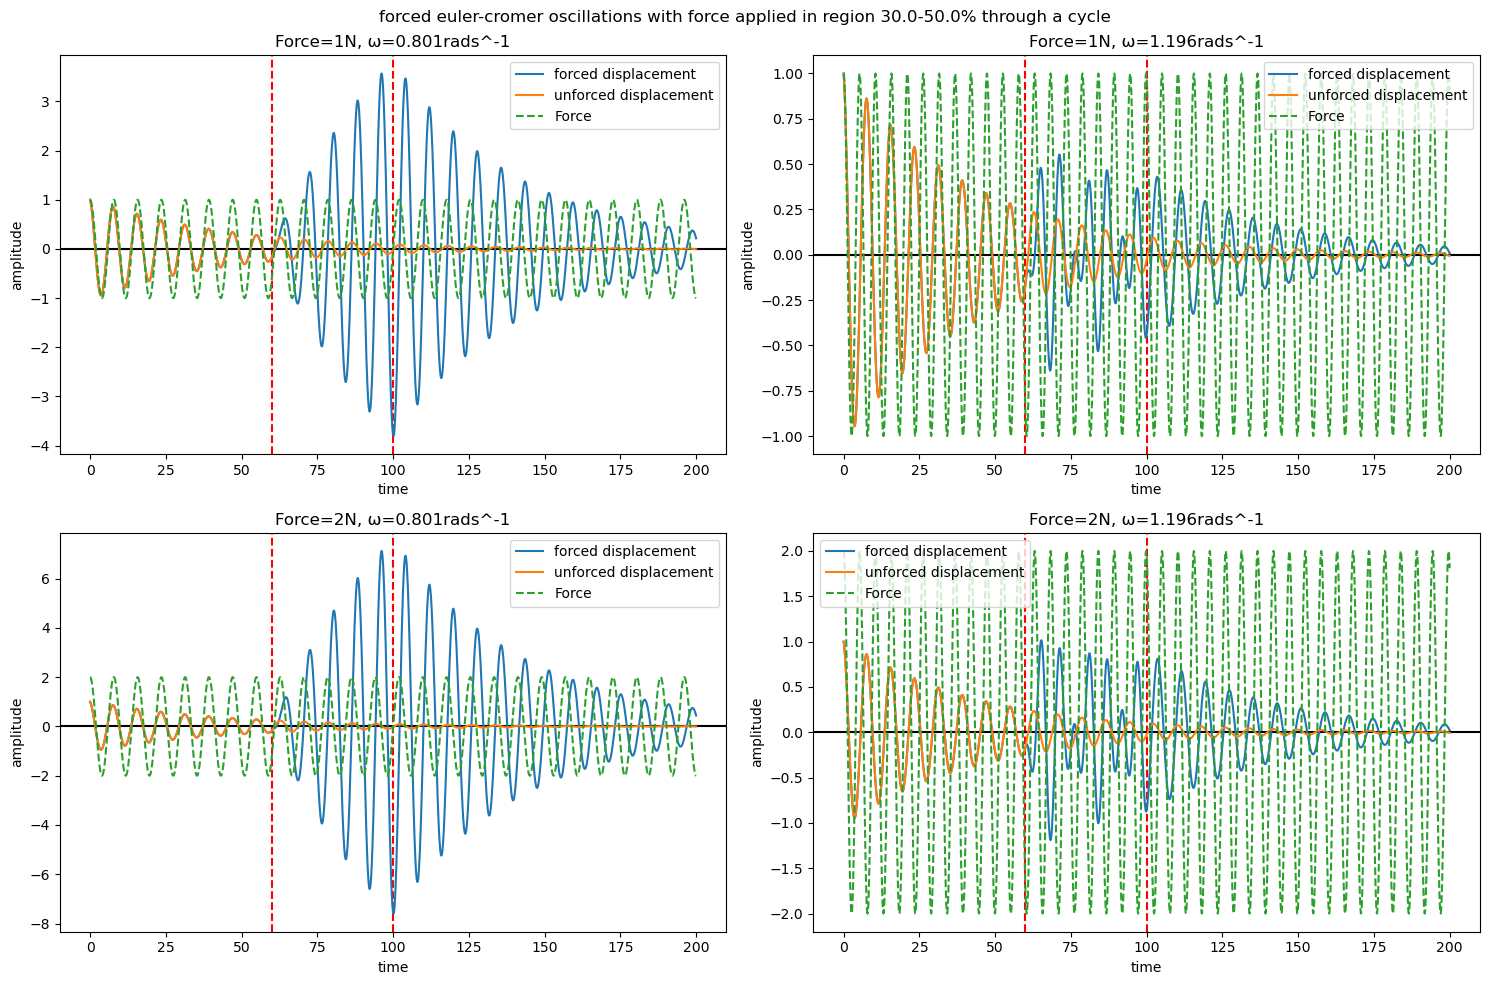

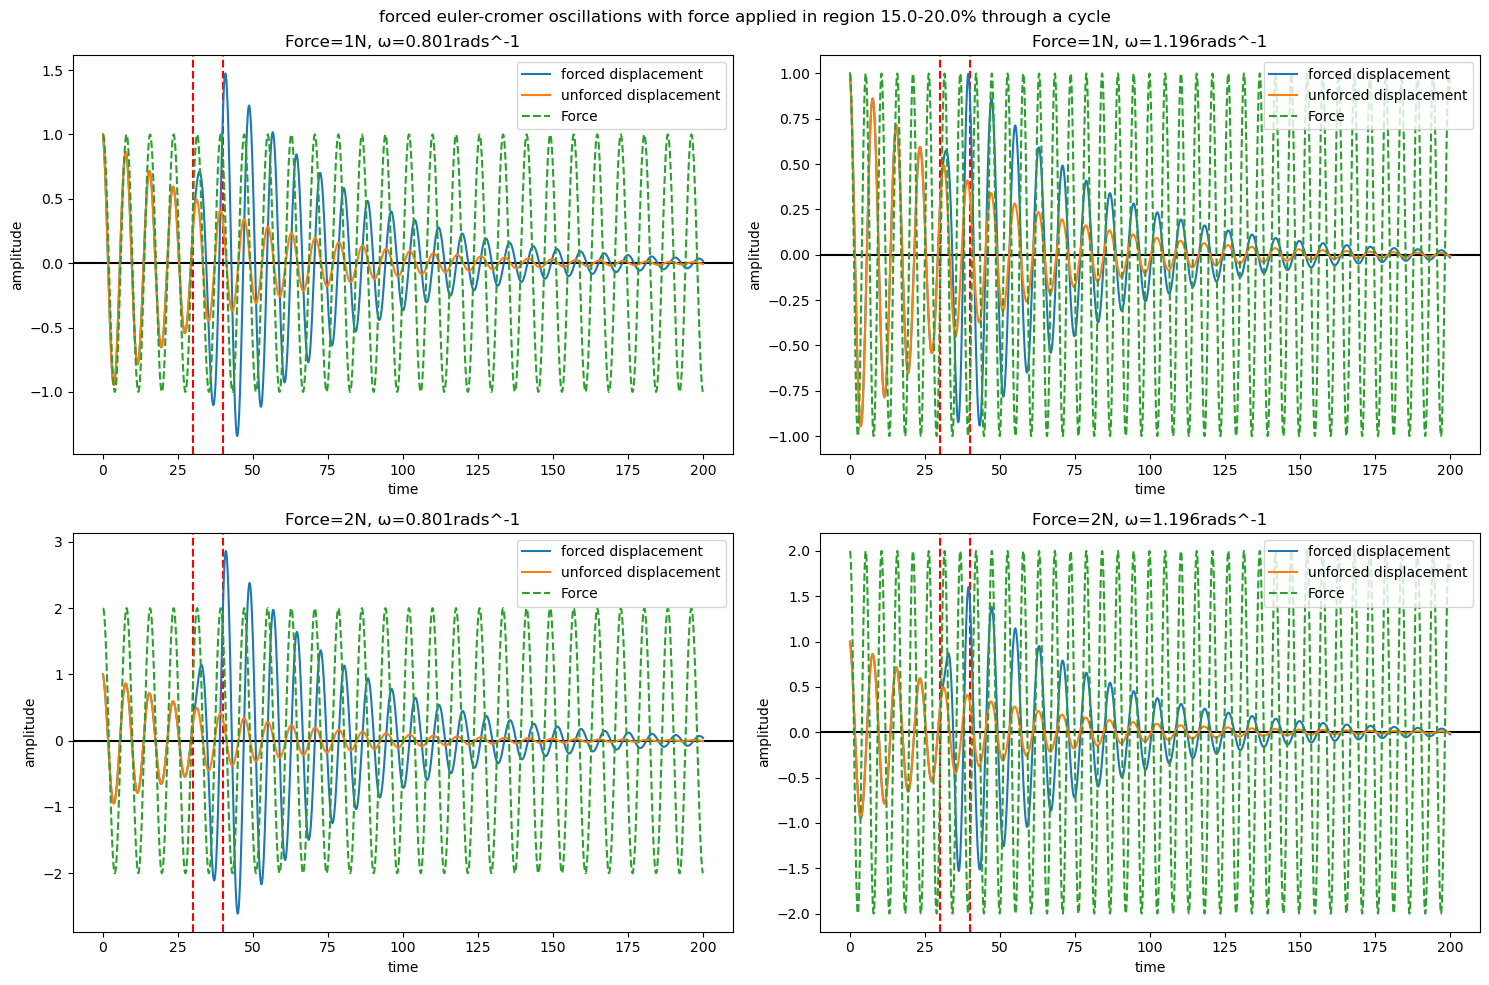

In [98]:
def forced_euler_cromer(m,b,k,T,h,x0,v0,F,omega,region):
    """
    Function that determins the displacement and velocity of a system undergoing SHM with a  force starting at a certain point in time oscillating with a constant frequency.

    Parameters
    ----------
    m : Float
        Mass of the system
    b : Float
        The damping factor of the system
    k : Float
        The spring constant of the system
    T : Integer
        Time of duration of total oscillation of the system
    h : float
        step size
    x0 : float
        initial displacement
    v0 : float
        initial velocity
    F : integer
        magnitude of force in push
    omega: float
        frequency of force oscillations
    region: Array
        Array containing fraction through plot to start and stop the application of the force
    
    Returns
    -------
    x : Array
        Array of position values at each step
    v : Array
        Array of velocity values at each step
    """
    nsteps=int(T/h)
    x=np.zeros([nsteps])
    v=np.zeros([nsteps])
    F_0=0
    x[0]=x0
    v[0]=v0
    for i in range(nsteps-1):
        if int(region[0]*nsteps)==i:
            F_0=F
        elif int(region[1]*nsteps)==i:
            F_0=0
        a=-(k/m)*x[i]-(b/m)*v[i]+((F_0*np.cos(omega*i*h))/m)
        v[i+1]=v[i]+h*a
        x[i+1]=x[i]+h*v[i+1]
    return x,v
omega_0=np.sqrt(k/m)
Forces=[1,2]
ranges=[np.array([0,0.8]),np.array([0.2,0.9]),np.array([0.3,0.5]),np.array([0.15,0.2])]
omegas=[np.round(omega_0+0.005,3),np.round(omega_0+0.4,3)]
for r in ranges:
    plt.subplots(2,2,figsize=(15,10))
    plt.suptitle('forced euler-cromer oscillations with force applied in region {}-{}% through a cycle'.format(r[0]*100,r[1]*100))
    for f in Forces:
        for o in omegas:
            plt.subplot(2,2,2*Forces.index(f)+omegas.index(o)+1)
            plt.axvline(r[0]*T,color='r',ls='--')
            plt.axvline(r[1]*T,color='r',ls='--')
            forced_data=forced_euler_cromer(m,b,k,T,h,x0,v0,f,o,r)
            plt.axhline(0,color='k')
            plt.plot(time,forced_data[0],label='forced displacement')
            plt.plot(time,Euler_Cromer(m,b,k,T,h,x0,v0)[0],label='unforced displacement')
            plt.plot(time,f*np.cos(o*time),ls='--',label='Force')
            plt.title('Force={}N, \u03c9={}rads^-1'.format(f,o))
            plt.xlabel('time')
            plt.ylabel('amplitude')
            plt.legend()
        plt.tight_layout()

plt.show()

# Resonance Curves

By assuming a solution to the equations of motion in the form of $e^{i(\omega t+\phi}$, The amplitude of oscillations can be found in terms of frequency.<br> The $\phi$ term of the solution is the phase and can be found to be given by $tan(\phi)=\frac{\omega b}{k-m\omega^2}$. This tells us the lag between the force applied and the systems response. At low frequencies compared to $\omega_0$, inertia doesn't have much of an effect as the system is evolving very slowly so the lag is close to 0. At high frequencies relative to $\omega_0$, the inertia dominates and the system is close to $\pi$ out of phase with the force.<br> The phase lag at $\omega=\omega_0$ is $\frac{\pi}{2}$.

A plot of the amplitude of the oscillations when driven at different frequencies can then be made, in theory showing a peak where $\omega_d=\omega_0$. In reality due to damping the peak will be very close to $\omega_0$, at a value of $\sqrt{\omega_0^2-\frac{\gamma^2}{2}}$. This can be seen in the plot as when the damping factor increases, the peak moves to the left.

The plot of phase lag against frequency shows both the analytical and euler-cromer phase lag sigmoids. We can see that close to $\omega_0$, the euler-cromer method well approximates the analytical phase lag. However, as $\omega_d$ moves away from $\omega_0$, the models diverge, with the analytical acting as expected and asymptoting at 0 and $\pi$, whereas the euler-cromer method asymptotes at $\frac{\pi}{4}$ and $\frac{\pi}{4}$, which suggests a limitation of the method to accurately model SHM far away from the resonant frequency.

analytical peak=0.7917795487095928 , euler-cromer peak=0.7921938753111928, for b=0.5
analytical peak=0.7561819546786543 , euler-cromer peak=0.7592074808529176, for b=1.5
analytical peak=0.6794142611362811 , euler-cromer peak=0.6849880933217983, for b=2.5


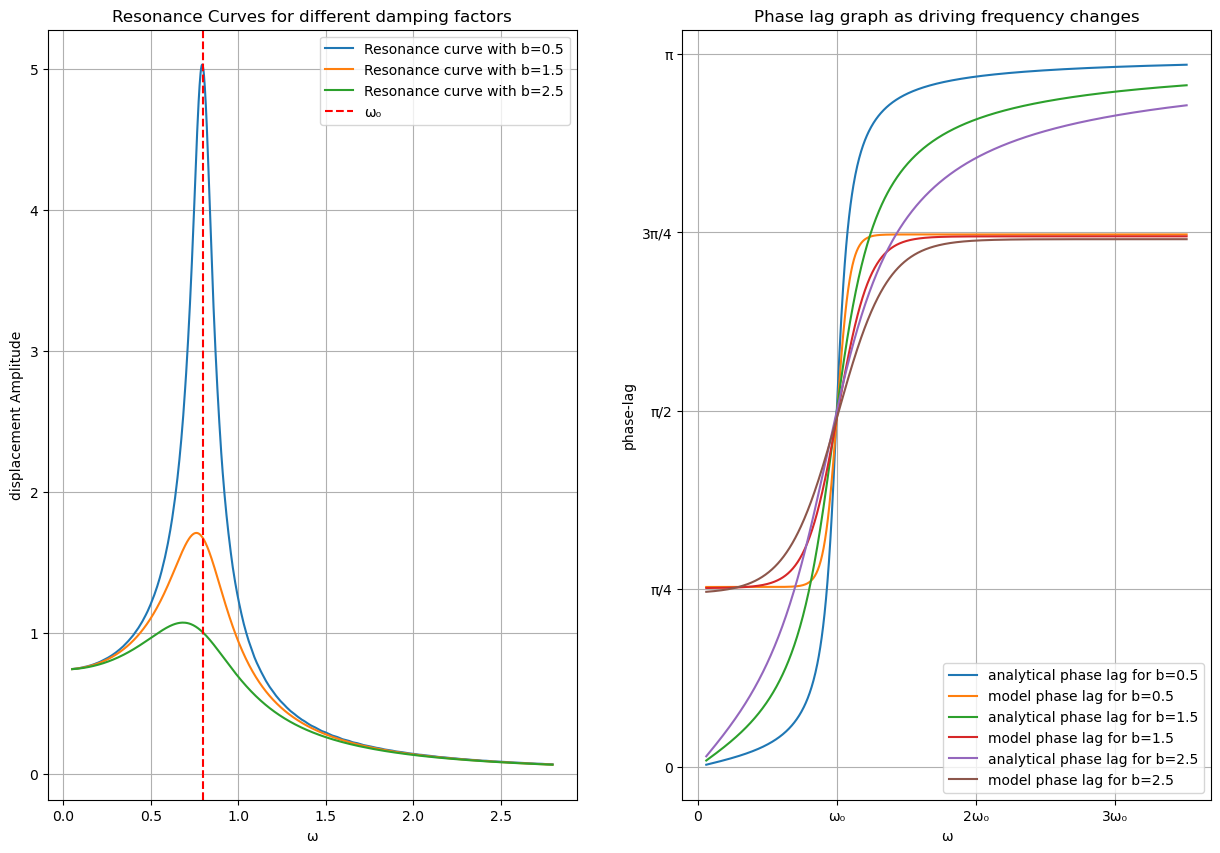

In [128]:
plt.subplots(1,2,figsize=(15,10))
omegas=np.linspace(0.05,omega_0+2,1000)
damping=[0.5,1.5,2.5]


def different_omegas(o):
    """
    Function that calcualtes the euler-cromer displacement for inputted driving frequencies, and also calcualtes the phase lag of the resultant oscillations compared to the driving force.

    Parameters
    ----------
    o : float
        driving frequency

    Returns
    -------
    peak amplitude from euler-cromer model
    phase_lag: float
        phase lag of displacement behind driving force.
    """
    d=forced_euler_cromer(m,b,k,T,h,x0,v0,2,o,(0,1))[0]
    #using fourier transform to find the frquency of the oscillations for each drivng frequency. This is the used to calculate the phase difference between the driving force and system.
    Xf=np.fft.fft(d)
    freqs=2*np.pi*np.fft.fftfreq(len(time),(time[1]-time[0]))
    closest_freq_idx=np.argmin(np.abs(freqs - o))
    phase_X_at_f0=np.angle(Xf[closest_freq_idx])
    phase_lag=phase_X_at_f0
    phase_lag=np.angle(np.exp(1j*phase_lag))
    return max(d[int(len(d)/2):-1]),phase_lag

def sigmoid(x,L,x0,k,b):
    """
    Function that calculates a sigmoid for given inputs

    Parameters
    ----------
    x : Array
        values over which the sigmod is calcualted
    L : float
        Maximum height of inputted data to scale function correctly
    x0 : float
        value to center sigmoid around
    k : integer
        x-axis scalar
    b : float
        x-axis shift

    Returns
    -------
    y: Array
        Array of values for the sigmoid curve
    """
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)


for b in damping:
    gamma=b/m
    Amplitudes=np.array(list((map(different_omegas,omegas))))
    
    curve=(max(Amplitudes[:,0])/(1+((omegas-omega_0)/gamma)**2))
    plt.subplot(1,2,1)
    plt.plot(omegas,Amplitudes[:,0],label='Resonance curve with b={}'.format(b))
    plt.xlabel('\u03c9')
    plt.ylabel('displacement Amplitude')

    plt.subplot(1,2,2)
    phase=np.arctan((b*omegas)/(k-(m*omegas**2)))
    result1=np.vectorize(lambda x: np.pi+x if x<0 else x)
    result2=np.vectorize(lambda x: abs(x) if x<0 else x)
    p0 = [max(Amplitudes[:,1]), np.median(omegas),1,min(Amplitudes[:,1])]
    popt,pcovr=curve_fit(sigmoid,omegas,result2(Amplitudes[:,1]),p0,method='lm')
    plt.plot(omegas,result1(phase),label='analytical phase lag for b={}'.format(b))
    plt.plot(omegas,sigmoid(omegas,*popt),label='model phase lag for b={}'.format(b))
    #print(result(Amplitudes[:,1]))
    plt.xticks([0,omega_0,2*omega_0,3*omega_0],['0','\u03c9\u2080','2\u03c9\u2080','3\u03c9\u2080'])
    plt.yticks([0,np.pi/2,np.pi,3*np.pi/4,np.pi/4],['0','\u03c0/2','\u03c0','3\u03c0/4','\u03c0/4'])
    plt.xlabel('\u03c9')
    plt.ylabel('phase-lag')
    plt.title('Phase lag graph as driving frequency changes')
    plt.grid()
    plt.legend()
    print('analytical peak={} , euler-cromer peak={}, for b={}'.format(np.sqrt(omega_0**2-((b/m)**2)/2),omegas[np.where(Amplitudes[:,0]==max(Amplitudes[:,0]))][0],b))

plt.subplot(1,2,1)
plt.title('Resonance Curves for different damping factors')
plt.axvline(omega_0,color='r',ls='--',label='\u03c9\u2080')
plt.grid()
plt.legend()




plt.show()